In [2]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
import numpy as np
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import * 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [4]:
train_image_generator = ImageDataGenerator(rescale=1.0/255,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                          )
test_image_generator = ImageDataGenerator(rescale=1.0/255)

training_images = train_image_generator.flow_from_directory(
                                        'CovidDataset/train',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary'
                                       )
testing_images = test_image_generator.flow_from_directory(
                                        'CovidDataset/test',
                                        target_size=(224, 224),
                                        batch_size=32,
                                        class_mode='binary')

Found 312 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [5]:
training_images.class_indices

{'Covid': 0, 'Normal': 1}

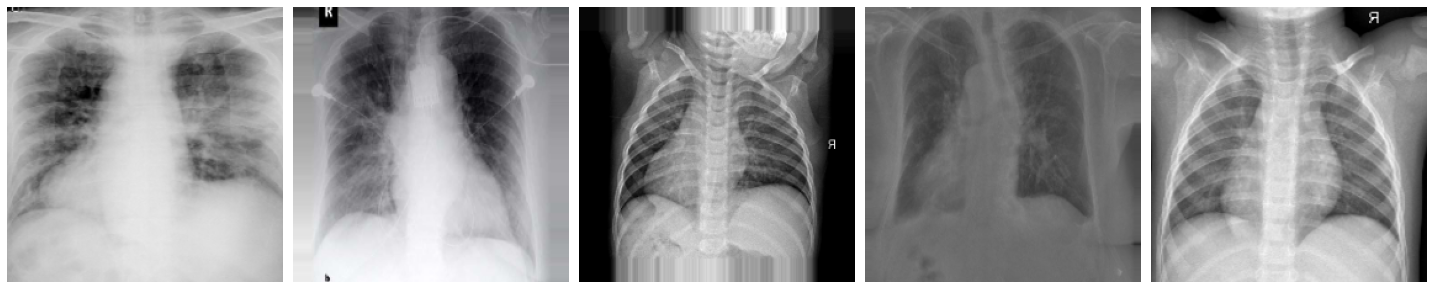

In [6]:
def plotImages(images):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
sample_training_images, _ = next(training_images)
plotImages(sample_training_images[:5])   

In [7]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [9]:
history = model.fit_generator(
    training_images,
    epochs = 10,
    validation_data = testing_images,
   )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
10/10 [==============================] - 68s 7s/step - loss: 2.4996 - accuracy: 0.5096 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 61s 6s/step - loss: 0.6761 - accuracy: 0.5994 - val_loss: 0.6685 - val_accuracy: 0.9250
Epoch 3/10
10/10 [==============================] - 63s 6s/step - loss: 0.6262 - accuracy: 0.6282 - val_loss: 0.5682 - val_accuracy: 0.8250
Epoch 4/10
10/10 [==============================] - 63s 6s/step - loss: 0.5394 - accuracy: 0.7308 - val_loss: 0.3726 - val_accuracy: 0.9250
Epoch 5/10
10/10 [==============================] - 61s 6s/step - loss: 0.3984 - accuracy: 0.7788 - val_loss: 0.2976 - val_accuracy: 0.9375
Epoch 6/10
10/10 [==============================] - 61s 6s/step - loss: 0.2933 - accuracy: 0.8558 - val_loss: 0.1398 - val_accuracy: 0.9500
Epoch 7/10
10/10 [==============================] - 61s 6s/step - loss: 0.2564 - acc

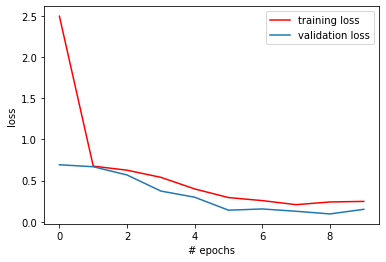

In [10]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

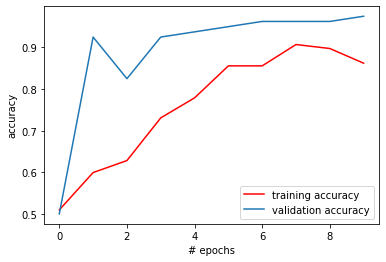

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
model.save("covid19model.h5")  # h5 format was a bit previous model for previous versions of kera
model.save("covid19model")       # the latest approach : model is a folder in which model will be saved anc can be any name of your choice
print(">> MODEL SAVED :)")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: covid19model\assets
>> MODEL SAVED :)
